In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
data = pd.read_csv('/Users/kai/Documents/STAT628/ildata.csv', index_col = None)

In [3]:
mask = (data['stars'] > 3.5) & (data['review_count'] > 50)
data[mask].is_open.value_counts()

is_open
1    90
0    13
Name: count, dtype: int64

In [12]:
data['attributes'].apply(lambda x : x.str.contains('Na

0      {'RestaurantsReservations': 'True', 'Restauran...
1      {'BusinessParking': "{u'valet': False, u'garag...
2      {'BusinessAcceptsCreditCards': 'True', 'Busine...
3      {'RestaurantsDelivery': 'False', 'BestNights':...
4      {'HasTV': 'True', 'RestaurantsTableService': '...
                             ...                        
978    {'BikeParking': 'True', 'BusinessParking': "{'...
979    {'RestaurantsTakeOut': 'True', 'RestaurantsRes...
980    {'BikeParking': 'True', 'NoiseLevel': "u'avera...
981    {'RestaurantsGoodForGroups': 'False', 'GoodFor...
982    {'RestaurantsPriceRange2': '1', 'RestaurantsTa...
Name: attributes, Length: 983, dtype: object

In [4]:
data = data[(data.state.str.contains('IL')) & (data.categories.str.contains('taurants'))]

In [6]:
business_ids = data.business_id.unique()

In [16]:
# review_data = pd.DataFrame()
# for chunk in tqdm(pd.read_json('yelp_Fall2023/review.json', lines = True, chunksize = 100000)):
#     temp = chunk[chunk.business_id.isin(business_ids)]
#     review_data = pd.concat([review_data, temp])

70it [05:56,  5.10s/it]


In [7]:
# data.to_csv('/Users/kai/Documents/STAT628/ildata.csv', index = None)
# review_data.to_csv('/Users/kai/Documents/STAT628/ilreviewdata.csv', index = None)
review_data = pd.read_csv('/Users/kai/Documents/STAT628/ilreviewdata.csv', index_col = None)

In [8]:
review_data.review_id.nunique()

36870

In [9]:
merged_data = data.merge(review_data, on = 'business_id')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

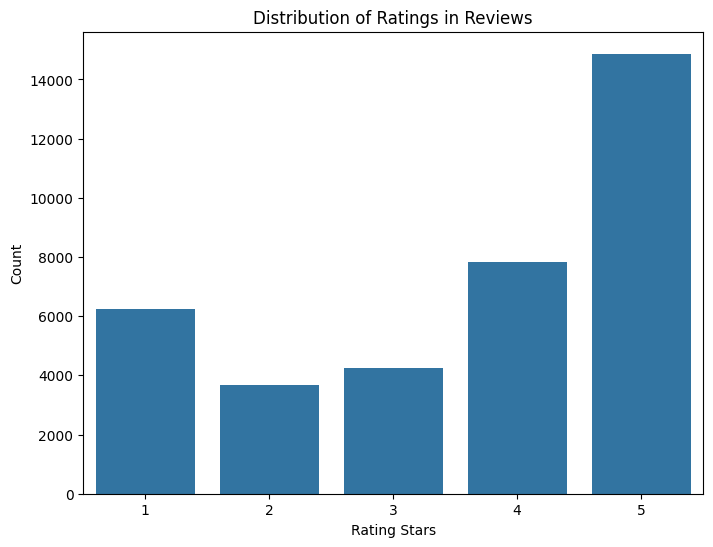

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=review_data)
plt.title('Distribution of Ratings in Reviews')
plt.xlabel('Rating Stars')
plt.ylabel('Count')
plt.show()

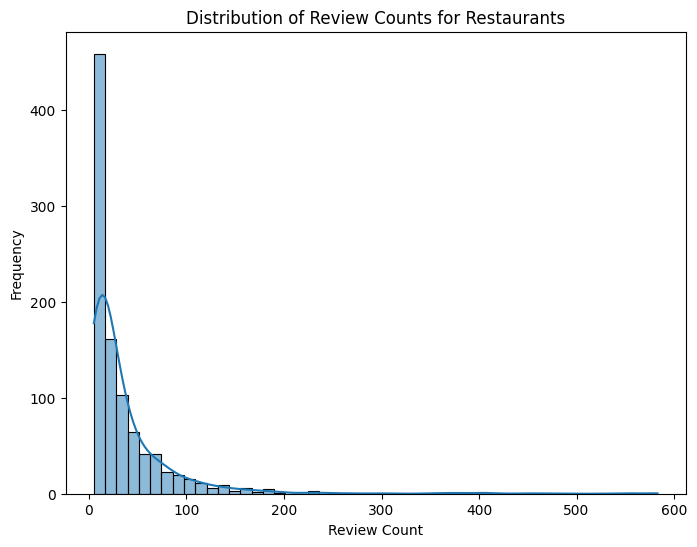

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data['review_count'], bins=50, kde=True)
plt.title('Distribution of Review Counts for Restaurants')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

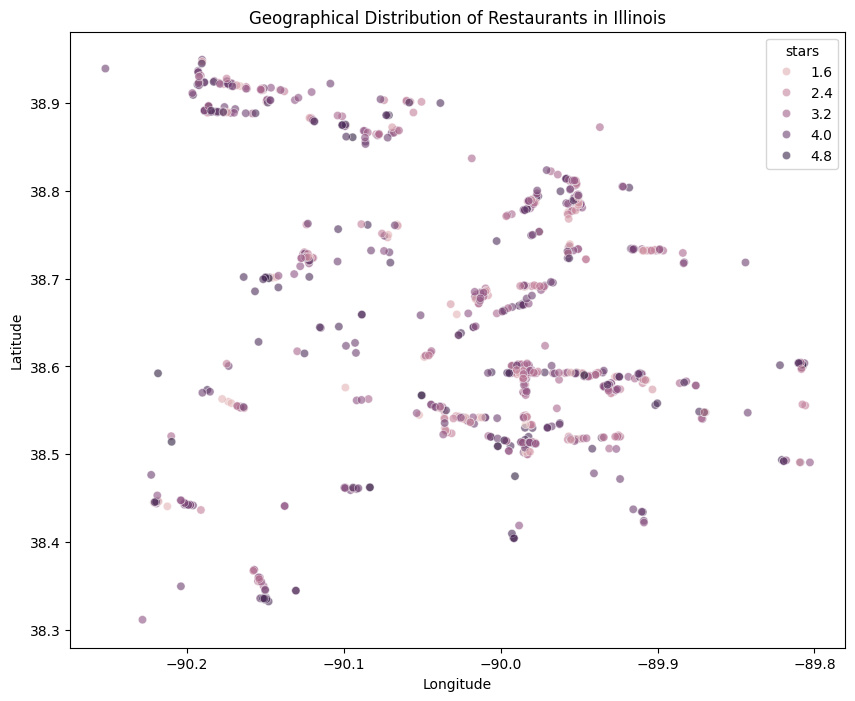

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='stars', data=data, alpha=0.6)
plt.title('Geographical Distribution of Restaurants in Illinois')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [14]:
average_ratings = data.groupby('postal_code')['stars'].mean().reset_index()

In [15]:
import geopandas as gpd

# Load the US counties GeoJSON file
us_counties_gdf = gpd.read_file('counties.geojson')

# Filter for counties in Illinois (assuming 'STATE' column contains state codes)
il_counties_gdf = us_counties_gdf[us_counties_gdf['STATEFP'] == '17']

In [16]:
il_counties_gdf

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
10,17,027,00424215,0500000US17027,17027,Clinton,06,1227823898,75642557,"POLYGON ((-89.70702 38.65515, -89.59510 38.655..."
31,17,067,00424235,0500000US17067,17067,Hancock,06,2055740566,53535827,"POLYGON ((-91.49696 40.24870, -91.49289 40.269..."
38,17,175,00424288,0500000US17175,17175,Stark,06,746121490,708705,"POLYGON ((-89.98456 41.14937, -89.86838 41.148..."
58,17,141,01784894,0500000US17141,17141,Ogle,06,1964706939,11425029,"POLYGON ((-89.68849 42.19911, -89.39619 42.201..."
60,17,075,00424239,0500000US17075,17075,Iroquois,06,2893780721,4225839,"POLYGON ((-88.13194 40.99784, -87.52646 41.010..."
...,...,...,...,...,...,...,...,...,...,...
3086,17,031,01784766,0500000US17031,17031,Cook,06,2447469694,1786452809,"POLYGON ((-88.26338 42.06663, -88.23829 42.092..."
3099,17,181,01785113,0500000US17181,17181,Union,06,1070855939,22502264,"POLYGON ((-89.50179 37.55890, -89.49775 37.569..."
3107,17,163,01784987,0500000US17163,17163,St. Clair,06,1703659884,42054455,"POLYGON ((-90.25529 38.53088, -90.24891 38.544..."
3194,17,125,00424261,0500000US17125,17125,Mason,06,1396619099,62745252,"POLYGON ((-90.35520 40.12424, -90.20614 40.155..."


In [17]:
zipcodes = pd.read_csv('zip_code_database.csv', index_col = None)
ilzipcodes = zipcodes[zipcodes['state'].str.contains('IL')][['zip', 'primary_city', 'acceptable_cities', 'state', 'county', 'irs_estimated_population']]

In [34]:
average_ratings = average_ratings.merge(ilzipcodes, left_on = 'postal_code', right_on = 'zip')
average_ratings.groupby('county').agg({'stars' : 'mean'}).index

Index(['Madison County', 'Monroe County', 'Sangamon County',
       'St. Clair County'],
      dtype='object', name='county')

In [35]:
ilcounties  =['Madison County', 'Monroe County', 'Sangamon County',
       'St. Clair County']

In [36]:
average_ratings.groupby('county').agg({'stars' : 'mean'}).round(2).stars.values

array([3.34, 3.51, 2.5 , 3.52])

In [19]:
filtered_data = data.merge(ilzipcodes[['zip', 'county', 'irs_estimated_population']], left_on = 'postal_code', right_on = 'zip').groupby('zip', as_index = False).agg({'stars':'mean', 'review_count' : 'sum', 'business_id' : 'count', 'irs_estimated_population' : 'sum'}).round(2)
filtered_data = filtered_data[(filtered_data['review_count'] > 100) & (filtered_data['business_id'] >= 10)].sort_values(by = 'stars', ascending = False)
filtered_data

,zip,stars,review_count,business_id,irs_estimated_population
29,62254,3.76,280,19,92340
35,62298,3.71,850,33,557370
31,62260,3.65,171,13,90740
18,62220,3.54,2862,54,871020
4,62025,3.43,6318,128,3781120
3,62024,3.42,200,12,93600
0,62002,3.42,2752,84,2101680
7,62040,3.39,972,55,1903000
10,62095,3.34,461,29,264770
26,62236,3.30,764,30,401700


In [20]:
# Basic Descriptive Statistics
aggregated_data = filtered_data
# aggregated_data.describe()

In [23]:
# Correlation Matrix
correlation = aggregated_data.corr()

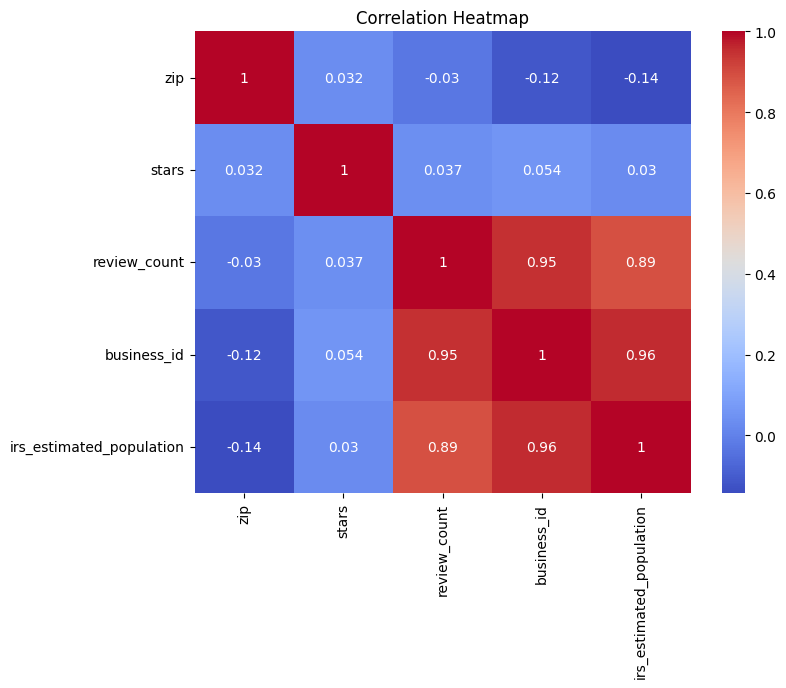

In [24]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Review Count and Business Density: There's a strong positive correlation (0.95) between review_count and business_id. This suggests that areas with more restaurants (business density) tend to have a higher total number of reviews, indicating higher customer traffic or activity.

Review Count, Business Density, and Population: Both review_count and business_id show a strong positive correlation with irs_estimated_population (0.89 and 0.96, respectively). This implies that areas with higher populations tend to have more businesses and reviews, aligning with the expectation that densely populated areas would have more restaurants and customer engagement.

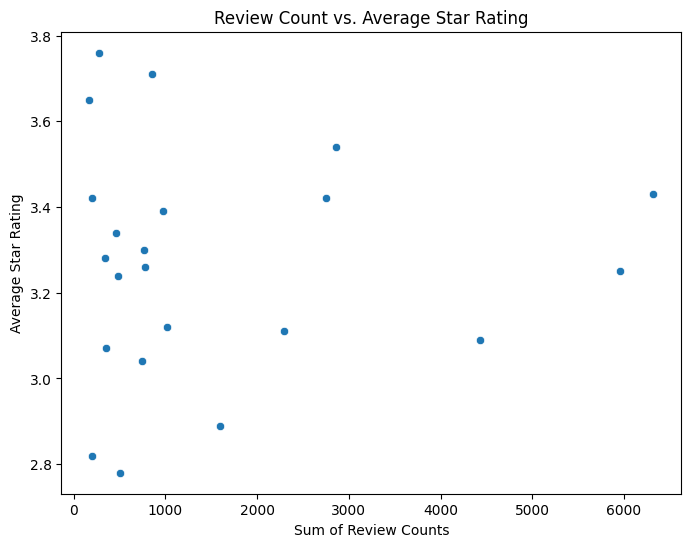

In [25]:
# Scatter Plot - Review Count vs. Average Stars
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_count', y='stars', data=aggregated_data)
plt.title('Review Count vs. Average Star Rating')
plt.xlabel('Sum of Review Counts')
plt.ylabel('Average Star Rating')
plt.show()

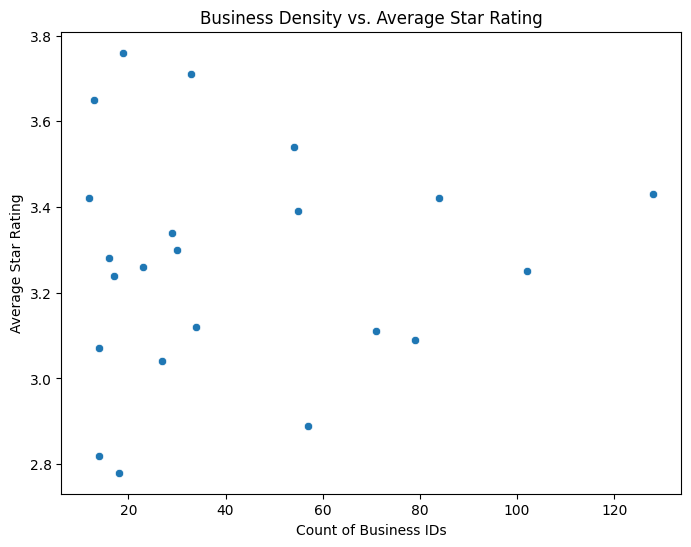

In [26]:
# Scatter Plot - Business Density vs. Average Stars
plt.figure(figsize=(8, 6))
sns.scatterplot(x='business_id', y='stars', data=aggregated_data)
plt.title('Business Density vs. Average Star Rating')
plt.xlabel('Count of Business IDs')
plt.ylabel('Average Star Rating')
plt.show()

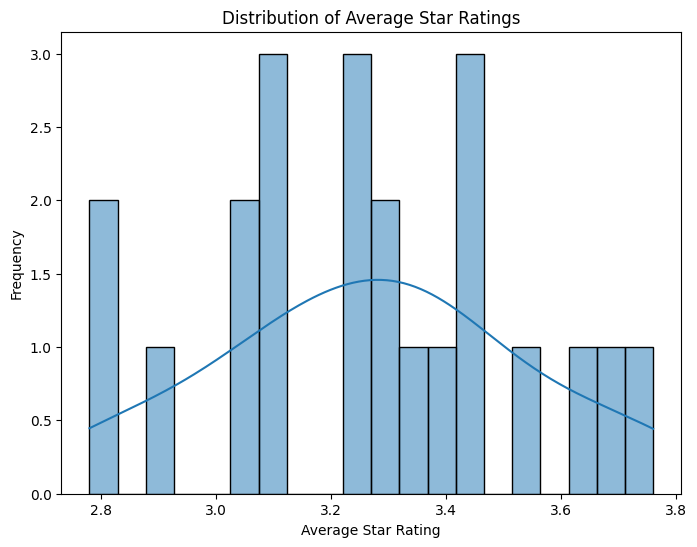

In [27]:
# Histogram - Distribution of Average Stars
plt.figure(figsize=(8, 6))
sns.histplot(aggregated_data['stars'], bins=20, kde=True)
plt.title('Distribution of Average Star Ratings')
plt.xlabel('Average Star Rating')
plt.ylabel('Frequency')
plt.show()

In [28]:
import folium

# Create a base map
# map_illinois = folium.Map(location=[41.8781, -87.6298], zoom_start=6)

# Add the Choropleth layer
map_illinois = folium.Map(location=[41.8781, -87.6298], zoom_start=6)

# Add the Choropleth layer
folium.Choropleth(
    geo_data=il_counties_gdf,  # Use the filtered Illinois counties GeoDataFrame
    name='choropleth',
    data=average_ratings,
    columns=['postal_code', 'stars'],  # Replace 'county_name' with the matching column in your data
    key_on='feature.properties.NAME',  # Align with the 'NAME' column in il_counties_gdf
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Rating'
).add_to(map_illinois)

folium.LayerControl().add_to(map_illinois)

# Display the map
map_illinois

In [29]:
stdf = pd.read_csv('yelp_Fall2023/Trips_by_Distance.csv', index_col = None)#, nrows = 1000)
stdf

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560749,State,2023/10/07,10.0,DE,NaN,NaN,193623.0,780141.0,4.222025e+06,1105040.0,...,693535.0,652105.0,223670.0,77334.0,26266.0,2843.0,2098.0,10-00000-20231007,40,10
5560750,State,2023/10/07,23.0,ME,NaN,NaN,265741.0,1078471.0,6.422140e+06,1475329.0,...,1058192.0,1117974.0,404352.0,119612.0,32754.0,2194.0,2987.0,23-00000-20231007,40,10
5560751,State,2023/10/07,40.0,OK,NaN,NaN,746731.0,3210240.0,1.694916e+07,4344331.0,...,2591151.0,2720144.0,952152.0,433461.0,201816.0,23013.0,7480.0,40-00000-20231007,40,10
5560752,State,2023/10/07,55.0,WI,NaN,NaN,1107713.0,4714721.0,2.820940e+07,7574840.0,...,4402765.0,4301354.0,1513604.0,611522.0,276734.0,30407.0,16301.0,55-00000-20231007,40,10


In [30]:
stdfil = stdf[(stdf['State FIPS'] == 17)]

In [31]:
stdfil = stdfil[~stdfil['County Name'].isna()]
stdfil['Date'] = stdfil['Date'].astype('datetime64[ns]')
stdfil['day_of_week'] = stdfil['Date'].dt.day_name()
stdfil.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,day_of_week
48639,County,2019-01-01,17.0,IL,17203.0,Woodford County,8452.0,30007.0,110249.0,16571.0,...,19074.0,7929.0,2469.0,1530.0,502.0,183.0,17-17203-20190101,0,1,Tuesday
48640,County,2019-01-01,17.0,IL,17201.0,Winnebago County,69605.0,212967.0,871581.0,213604.0,...,87588.0,24370.0,20510.0,7482.0,2393.0,1389.0,17-17201-20190101,0,1,Tuesday
48641,County,2019-01-01,17.0,IL,17199.0,Williamson County,15580.0,51017.0,243284.0,63107.0,...,28741.0,9969.0,4493.0,1971.0,455.0,152.0,17-17199-20190101,0,1,Tuesday
48642,County,2019-01-01,17.0,IL,17197.0,Will County,158183.0,532560.0,2051594.0,502804.0,...,277372.0,146851.0,26154.0,18716.0,4861.0,3682.0,17-17197-20190101,0,1,Tuesday
48643,County,2019-01-01,17.0,IL,17195.0,Whiteside County,12530.0,42645.0,165062.0,36040.0,...,23011.0,9717.0,4640.0,2494.0,450.0,102.0,17-17195-20190101,0,1,Tuesday


In [37]:
stdfil_population_days = stdfil[stdfil['County Name'].isin(ilcounties)].groupby(['County Name', 'day_of_week'], as_index = False).agg({'Population Staying at Home' : 'mean', 'Population Not Staying at Home' : 'mean'}).round().sort_values(['County Name', 'day_of_week', 'Population Staying at Home', 'Population Not Staying at Home'])

<Axes: xlabel='Date'>

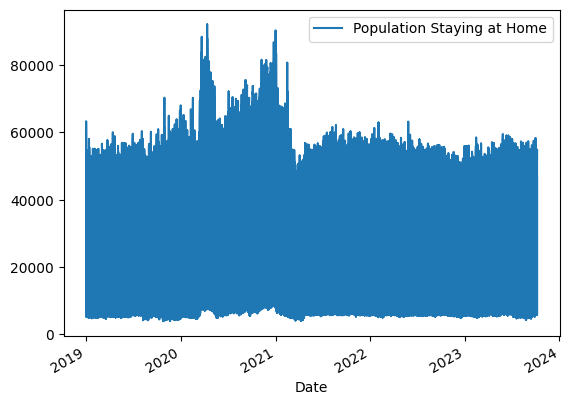

In [38]:
stdfil[stdfil['County Name'].isin(ilcounties)].plot(kind = 'line', x = 'Date', y = 'Population Staying at Home')

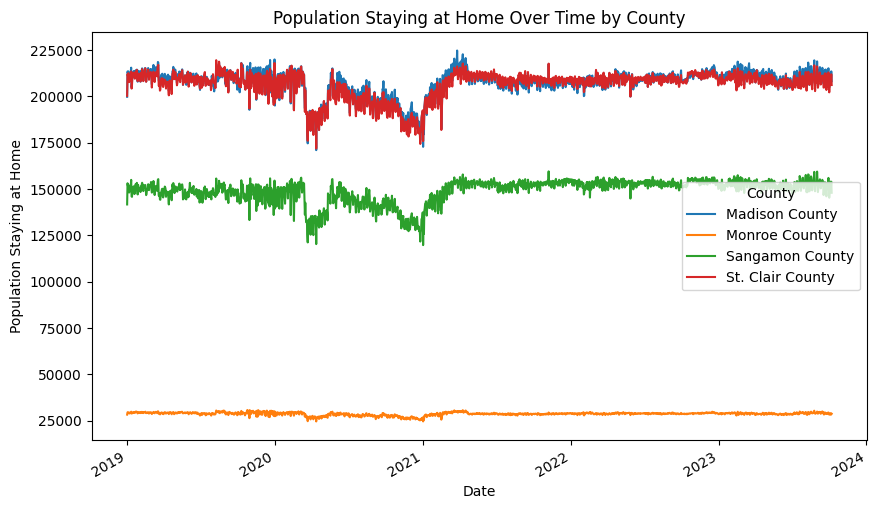

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

for county, group in stdfil[stdfil['County Name'].isin(ilcounties)].groupby('County Name'):
    group.plot(x='Date', y='Population Not Staying at Home', ax=ax, label=county)

plt.xlabel('Date')
plt.ylabel('Population Staying at Home')
plt.title('Population Staying at Home Over Time by County')
plt.legend(title='County')

plt.show()

In [98]:
# stdfilcounties = stdfil[stdfil['County Name'].isin(ilcounties)]
# transilcounties  = merged_data.merge(stdfilcounties, left_on = 'county', right_on = 'County Name')

In [41]:
transilcounties['Date'] = pd.to_datetime(transilcounties['Date'])
transilcounties.set_index('Date', inplace=True)
monthly_data = transilcounties.resample('M').mean()
correlation = monthly_data[['Population Staying at Home', 'Yelp Rating']].corr()
correlation

NameError: name 'transilcounties' is not defined

In [ ]:
stdfil_population_days.plot(kind = 'bar', stacked = True, x = 'County Name')

In [ ]:
# review_data['day_of_week'] = 
review_data['date'] = review_data['date'].astype('datetime64[ns]')
review_data['day_of_week'] = review_data['date'].dt.day_name()
review_data['year'] = review_data['date'].dt.year
review_data['hour'] = review_data['date'].dt.hour

In [ ]:
# review_data.groupby('day_of_week', as_index = False).agg({'stars' : 'mean', 'useful' : 'mean'}).round(2)
user_reviews = review_data.groupby(['user_id', 'day_of_week']).agg({'stars' : 'mean', 'review_id' : 'count'})
user_reviews[user_reviews['review_id'] > 10]

In [ ]:
grouped_data = review_data.groupby(['day_of_week', 'hour'], as_index = False).agg({'stars' : 'mean'}).round(2)
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=grouped_data, x='hour', y='stars', hue='day_of_week', marker='o')
# plt.title('Trend of Average Stars by Hour and Day of the Week')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Average Stars')
# plt.xticks(range(0, 24))  # Assuming 'hour' ranges from 0 to 23
# plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()
days = grouped_data['day_of_week'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(days), ncols=1, figsize=(10, 2 * len(days)))

for i, day in enumerate(days):
    sns.lineplot(data=grouped_data[grouped_data['day_of_week'] == day], 
                 x='hour', y='stars', ax=axes[i], marker='o')
    axes[i].set_title(f'Trend of Average Stars for {day}')
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Average Stars')
    axes[i].set_xticks(range(0, 24))# Assuming 'hour' ranges from 0 to 23
    # axes[i].set_yticks((2.5, 4.5))
    # axes[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# merged_data
zipcode_county_mapping = average_ratings[['postal_code', 'county']].set_index('postal_code').to_dict()['county']

In [ ]:
merged_data['county'] = merged_data['postal_code'].apply(lambda x : zipcode_county_mapping.get(x))

In [ ]:
merged_data['day_of_review'] = merged_data['date'].astype('datetime64[ns]').dt.day_name()
merged_data['hour_of_review'] = merged_data['date'].astype('datetime64[ns]').dt.hour

In [ ]:
merged_data.to_csv('/Users/kai/Documents/STAT628/il_merged_data.csv', index = None)

In [247]:
merged_data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'stars_y',
       'useful', 'funny', 'cool', 'text', 'date', 'county', 'day_of_review',
       'hour_of_review'],
      dtype='object')

In [277]:
il_counties_gdf = il_counties_gdf[il_counties_gdf['NAME'].isin([x.replace(" County", "") for x in ilcounties])]

In [316]:
il_counties_gdf['NAME'] = il_counties_gdf['NAME'] + ' County'

In [296]:
gdf = gpd.GeoDataFrame(geometry=il_counties_gdf.geometry.values)
gdf['avg_stars'] = [3.34, 3.51, 2.5 , 3.52]

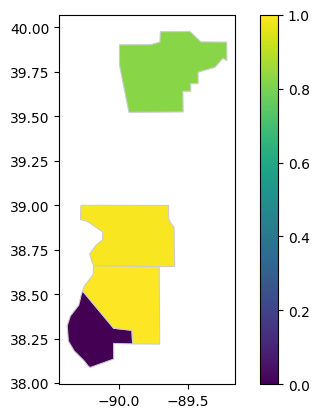

In [298]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='avg_stars', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax)
plt.show()

In [319]:
county_review_by_day = merged_data.groupby(['county', 'day_of_review'], as_index = False).agg({'stars_y' : 'mean'}).round(2).pivot_table(index = 'county', columns='day_of_review', values='stars_y')

In [322]:
gdf = gpd.GeoDataFrame(county_review_by_day.merge(il_counties_gdf[['NAME', 'geometry']], left_on = 'county', right_on = 'NAME'))

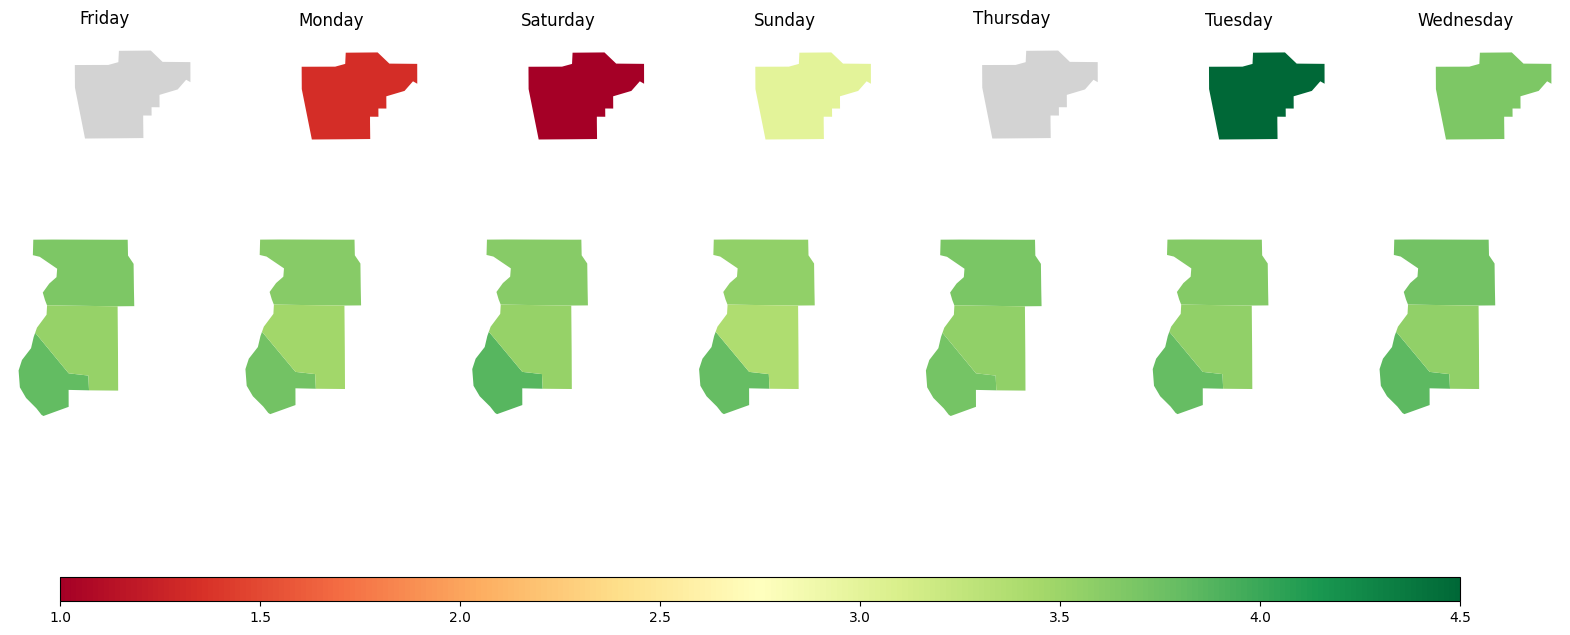

In [334]:
min_value = gdf[['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']].min().min()
max_value = gdf[['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']].max().max()
# Days of the week
# Days of the week
days = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

# Create subplots
fig, axes = plt.subplots(1, len(days), figsize=(20, 8))  # Adjust the figsize as needed
plt.subplots_adjust(bottom=0.2)  # Adjust the figsize as needed

for i, day in enumerate(days):
    ax = axes[i]
    # Plot without adding a color bar
    gdf.plot(column=day, ax=ax, cmap='RdYlGn', vmin=min_value, vmax=max_value, missing_kwds={'color': 'lightgrey'})
    ax.set_title(day)
    ax.set_axis_off()

norm = plt.Normalize(vmin=min_value, vmax=max_value)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='RdYlGn'), 
                    orientation='horizontal',
                    cax=fig.add_axes([0.15, 0.08, 0.7, 0.03]))
# Create a color bar
# fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='RdYlGn'), ax=axes.ravel().tolist(), orientation='horizontal')

# plt.tight_layout()
plt.show()

In [46]:
merged_data.text[0]

"We had been driving around for some time, on a weekday last week.  This was our last time in town, as we had sold our home in Alton.  So, after going to 3 different restaurants and finding that they are closed for various reasons, we decided we would come here.  WOW,  Seriously, everything happens for a reason, and WOW.   We were maybe one of the first patrons in the restaurant upon opening.  The ambiance is lovely.  We were greeted warmly initially, and the warmness continued throughout our visit.  As I said prior, the ambiance is lovely, the decor is SO just want to take it home.  The service was impeccable, our waitress was attentive, friendly, knowledgeable, and smiley.  OMG. The food.  THE FOOD!!!!  We had their summer special .  Holy COW, were they fantastic!  Entrees were   seafood shrimp Alfredo and our friend and I had the steak.  Honestly, you cannot go wrong with anything that you order from Tony's.  Top notch, old school dining experience, which is RARE."

In [74]:
from transformers import pipeline

# Open and read the article
to_tokenize = merged_data.text[0]

# Initialize the HuggingFace summarization pipeline
# summarizer = pipeline("summarization")
summarized = summarizer(to_tokenize, min_length=20, max_length=100)

# Print summarized text
print(summarized)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
config.json: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.80k/1.80k [00:00<00:00, 3.27MB/s]
pytorch_model.bin: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.22G/1.22G [00:29<00:00, 40.8MB/s]
tokenizer_config.json: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26.0/26.0 [00:00<00:00, 44.8kB/s]
vocab.json: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 899k/899k [00:00<00:00, 21.6MB/s]
merges.txt: 100%|████████████████

[{'summary_text': ' The ambiance is lovely, the decor is SO just want to take it home . The service was impeccable, our waitress was attentive, friendly, knowledgeable, and smiley . The summer special was their seafood shrimp Alfredo .'}]


In [81]:
temp = summarizer(merged_data.text[2], min_length=0, max_length=50)[0]['summary_text']
print(len(temp.split(" ")), len(merged_data.text[2].split(" ")))

35 67


In [88]:
merged_data.text[0]

"We had been driving around for some time, on a weekday last week.  This was our last time in town, as we had sold our home in Alton.  So, after going to 3 different restaurants and finding that they are closed for various reasons, we decided we would come here.  WOW,  Seriously, everything happens for a reason, and WOW.   We were maybe one of the first patrons in the restaurant upon opening.  The ambiance is lovely.  We were greeted warmly initially, and the warmness continued throughout our visit.  As I said prior, the ambiance is lovely, the decor is SO just want to take it home.  The service was impeccable, our waitress was attentive, friendly, knowledgeable, and smiley.  OMG. The food.  THE FOOD!!!!  We had their summer special .  Holy COW, were they fantastic!  Entrees were   seafood shrimp Alfredo and our friend and I had the steak.  Honestly, you cannot go wrong with anything that you order from Tony's.  Top notch, old school dining experience, which is RARE."

In [87]:
summarizer(merged_data.text[0], min_length=10, max_length=50)[0]['summary_text']

' The ambiance is lovely, the decor is SO just want to take it home . The service was impeccable, our waitress was attentive, friendly, knowledgeable, and smiley . The summer special was their seafood shrimp Alfredo .'

In [94]:
tokenizer = AutoTokenizer.from_pretrained('sshleifer/distilbart-cnn-12-6')
model = AutoModelForSeq2SeqLM.from_pretrained('sshleifer/distilbart-cnn-12-6')

In [95]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

def summarize_text(text):
    # Load the tokenizer and model for DistilBART
    # Encode the text and truncate to model's max input length
    inputs = tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)

    # Generate the summary
    summary_ids = model.generate(inputs['input_ids'], num_beams=2, max_length=200, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

In [99]:
import time
st = time.time()
summary = summarize_text(merged_data.text[0])
et = time.time()
print("Summary:", summary)

Summary:  The ambiance is lovely, the decor is SO just want to take it home. The service was impeccable, our waitress was attentive, friendly, knowledgeable, and smiley. The food was fantastic. Top notch, old school dining experience, which is RARE.


In [100]:
et-st

56.24970006942749